# Import Modules

In [1]:
# Data handling
import os
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning Algs
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Splitting, Processing, Scaling, Metrics, and More!
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report

# Static Variables

In [2]:
# Paths
base_path = os.getcwd()
train_data = os.path.join(base_path, 'Datasets', 'train.csv')
test_data = os.path.join(base_path, 'Datasets', 'test.csv')

# Load Data
train_df = pd.read_csv(train_data)
test_df = pd.read_csv(test_data)

In [4]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Exploratory Data Analysis / Cleaning

In [5]:
"""
We want to replace Sex values and Embarked values with numbers. 
Sex = Males: 0, Females: 1
Emarked = S: 0, C: 1, Q: 2
"""
train_df['Sex'].replace({'male':0, 'female':1}, inplace=True) 
train_df['Embarked'].replace({'S':0, 'C':1, 'Q':2}, inplace=True) 
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,0.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1.0


In [6]:
train_df.describe(include='all')
# We will have to clean the Age column (over 100 nulls).  
#Embarked isn't missing enough to cause concern; we'll just drop the two rows without values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891.000000,714.000000,891.000000,891.000000,891,891.000000,204,889.000000
unique,NaN,NaN,NaN,891,NaN,NaN,NaN,NaN,681,NaN,147,NaN
top,NaN,NaN,NaN,"Abbing, Mr. Anthony",NaN,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,NaN
freq,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,7,NaN,4,NaN
mean,446.000000,0.383838,2.308642,NaN,0.352413,29.699118,0.523008,0.381594,NaN,32.204208,NaN,0.362205
std,257.353842,0.486592,0.836071,NaN,0.477990,14.526497,1.102743,0.806057,NaN,49.693429,NaN,0.636157
min,1.000000,0.000000,1.000000,NaN,0.000000,0.420000,0.000000,0.000000,NaN,0.000000,NaN,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,20.125000,0.000000,0.000000,NaN,7.910400,NaN,0.000000
50%,446.000000,0.000000,3.000000,NaN,0.000000,28.000000,0.000000,0.000000,NaN,14.454200,NaN,0.000000
75%,668.500000,1.000000,3.000000,NaN,1.000000,38.000000,1.000000,0.000000,NaN,31.000000,NaN,1.000000


In [7]:
# To clean the age, we'll just fill null's with the mean
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
# And we'll drop the two rows missing Embarked values
train_df.dropna(subset=['Embarked'],inplace=True)

In [8]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,889.000000,889.000000,889.000000,889,889.000000,889.000000,889.000000,889.000000,889,889.000000,202,889.000000
unique,NaN,NaN,NaN,889,NaN,NaN,NaN,NaN,680,NaN,146,NaN
top,NaN,NaN,NaN,"Abbing, Mr. Anthony",NaN,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,NaN
freq,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,7,NaN,4,NaN
mean,446.000000,0.382452,2.311586,NaN,0.350956,29.653446,0.524184,0.382452,NaN,32.096681,NaN,0.362205
std,256.998173,0.486260,0.834700,NaN,0.477538,12.968366,1.103705,0.806761,NaN,49.697504,NaN,0.636157
min,1.000000,0.000000,1.000000,NaN,0.000000,0.420000,0.000000,0.000000,NaN,0.000000,NaN,0.000000
25%,224.000000,0.000000,2.000000,NaN,0.000000,22.000000,0.000000,0.000000,NaN,7.895800,NaN,0.000000
50%,446.000000,0.000000,3.000000,NaN,0.000000,29.699118,0.000000,0.000000,NaN,14.454200,NaN,0.000000
75%,668.000000,1.000000,3.000000,NaN,1.000000,35.000000,1.000000,0.000000,NaN,31.000000,NaN,1.000000


In [70]:
train_df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005028,-0.035330,-0.043136,0.030300,-0.057686,-0.001657,0.012703,-0.030555
Survived,-0.005028,1.000000,-0.335549,0.541585,-0.074673,-0.034040,0.083151,0.255290,0.108669
Pclass,-0.035330,-0.335549,1.000000,-0.127741,-0.327954,0.081656,0.016824,-0.548193,0.043835
Sex,-0.043136,0.541585,-0.127741,1.000000,-0.089434,0.116348,0.247508,0.179958,0.118593
Age,0.030300,-0.074673,-0.327954,-0.089434,1.000000,-0.231875,-0.178232,0.088604,0.009499
SibSp,-0.057686,-0.034040,0.081656,0.116348,-0.231875,1.000000,0.414542,0.160887,-0.060606
Parch,-0.001657,0.083151,0.016824,0.247508,-0.178232,0.414542,1.000000,0.217532,-0.079320
Fare,0.012703,0.255290,-0.548193,0.179958,0.088604,0.160887,0.217532,1.000000,0.063462
Embarked,-0.030555,0.108669,0.043835,0.118593,0.009499,-0.060606,-0.079320,0.063462,1.000000


# Visualizations

Text(0.5, 1.0, 'Fare Price v Survival Distribution')

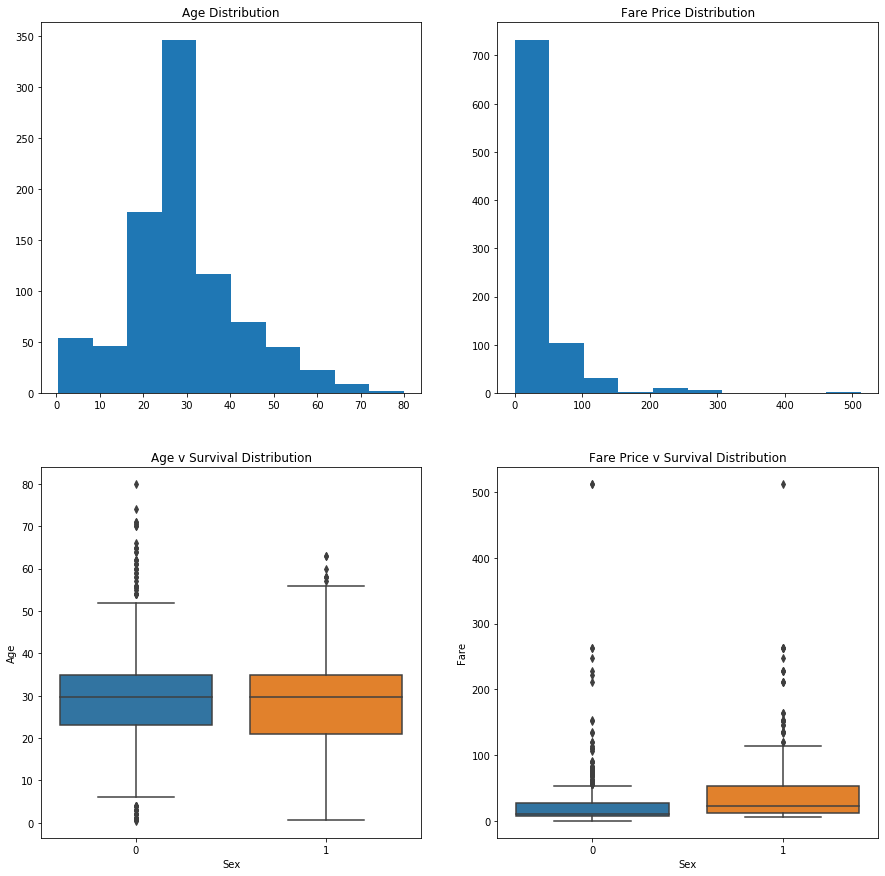

In [129]:
# Histograms for continuous features

plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
plt.hist(train_df['Age'],)
plt.title('Age Distribution')

plt.subplot(2,2,2)
plt.hist(train_df['Fare'])
plt.title('Fare Price Distribution')

plt.subplot(2,2,3)
sns.boxplot('Sex','Age', data=train_df)
plt.title('Age v Survival Distribution')

plt.subplot(2,2,4)
sns.boxplot('Sex','Fare',data=train_df)
plt.title('Fare Price v Survival Distribution')

# Prep Data for ML

In [61]:
# Separate Features from Target.  We're only going to look at features that had high correlation
X = train_df[['Pclass','Sex','Embarked','SibSp','Fare','Age']]
y = train_df['Survived']

In [62]:
X.head()

,Pclass,Sex,Embarked,SibSp,Fare,Age
0,3,0,0.0,1,7.2500,22.0
1,1,1,1.0,1,71.2833,38.0
2,3,1,0.0,0,7.9250,26.0
3,1,1,0.0,1,53.1000,35.0
4,3,0,0.0,0,8.0500,35.0


In [63]:
X.describe()

,Pclass,Sex,Embarked,SibSp,Fare,Age
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,0.350956,0.362205,0.524184,32.096681,29.653446
std,0.834700,0.477538,0.636157,1.103705,49.697504,12.968366
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.420000
25%,2.000000,0.000000,0.000000,0.000000,7.895800,22.000000
50%,3.000000,0.000000,0.000000,0.000000,14.454200,29.699118
75%,3.000000,1.000000,1.000000,1.000000,31.000000,35.000000
max,3.000000,1.000000,2.000000,8.000000,512.329200,80.000000


In [64]:
# Scale the data
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [65]:
# Separate into test and train arrays
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.33)

# Random Forest Classifier

In [68]:
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train, y_train)

print(rfc.score(X_test,y_test))

0.8061224489795918


C:\Users\Derek\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Check metrics

In [69]:
rfc_predictions = rfc.predict(X_test)
print("Random Forest Classifier Confusion Matrix:\n", confusion_matrix(y_test, rfc_predictions))
print("\nRandom Forest Classifier Report:\n", classification_report(y_test, rfc_predictions))

Random Forest Classifier Confusion Matrix:
 [[160  31]
 [ 26  77]]

Random Forest Classifier Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       191
           1       0.71      0.75      0.73       103

    accuracy                           0.81       294
   macro avg       0.79      0.79      0.79       294
weighted avg       0.81      0.81      0.81       294

